In [2]:
import pandas # read csv file
import numpy  # array functions
import matplotlib.pyplot as plt # data visualization
import scipy # collection of statistics tool (regression and analysis function)
import seaborn # function for graphic regression

%matplotlib inline
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [3]:
df = pandas.read_csv(r'C:\Users\silvaart\Desktop\workspace\pessoal\Programacao\AI-playing-Pong-master\Happiness World Report\2015.csv')
df.head()

,Country,Region,Happiness Rank,Happiness_Score,Standard Error,Economy (GDP per Capita),Family,Health,Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
df.isnull().any()

Country                          False
Region                           False
Happiness Rank                   False
Happiness_Score                  False
Standard Error                   False
Economy (GDP per Capita)         False
Family                           False
Health                           False
Freedom                          False
Trust (Government Corruption)    False
Generosity                       False
Dystopia Residual                False
dtype: bool

In [5]:
df.describe()

,Happiness Rank,Happiness_Score,Standard Error,Economy (GDP per Capita),Family,Health,Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


'\nTo make this histogram work is necessary to send: \n    %matplotlib inline\n    %pylab inline\n'

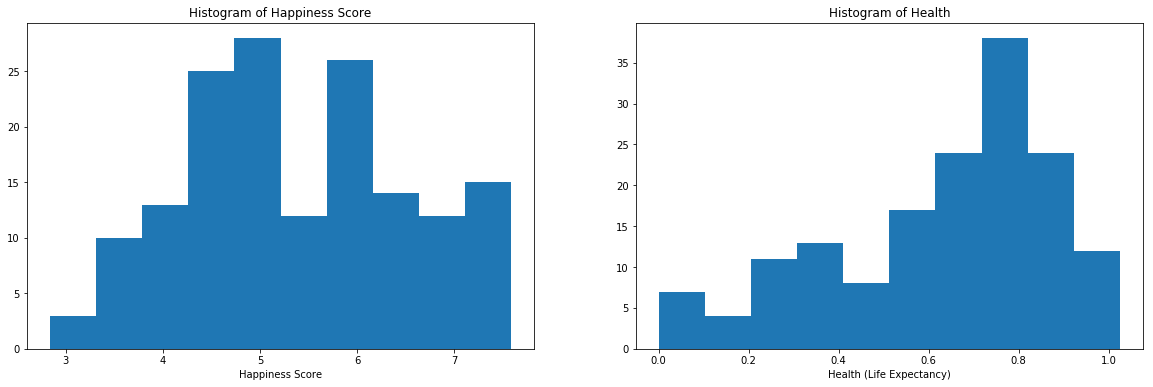

In [6]:
figure = pyplot.figure(figsize=(20, 6))
happiness = figure.add_subplot(121)
health = figure.add_subplot(122)

happiness.hist(df.Happiness_Score)
happiness.set_xlabel('Happiness Score')
happiness.set_title('Histogram of Happiness Score')

health.hist(df.Health)
health.set_xlabel('Health (Life Expectancy)')
health.set_title('Histogram of Health')

'''
To make this histogram work is necessary to send: 
    %matplotlib inline
    %pylab inline
'''

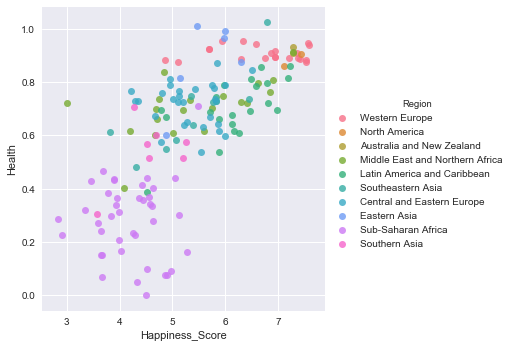

In [24]:
seaborn.lmplot(x='Happiness_Score', y='Health', data=df,hue="Region", fit_reg=False)
# Relationship between the Region and it's Life Expectancy and the Happiness Score
# Higher happiness score were close to Western Europe
# Lower happiness score were close to Southern Asia and Sub-Saharan Africa

' Happiness Score are highly correlated with economy, family and health '

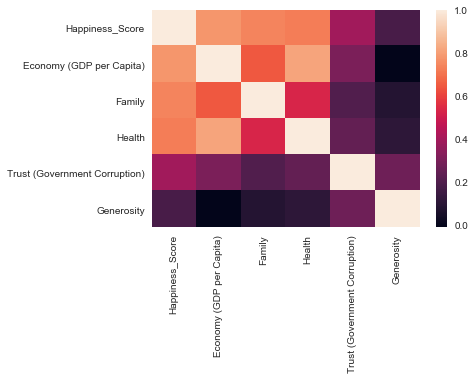

In [50]:
generosity_df = df.drop(['Country', 'Happiness Rank', 'Standard Error', 'Freedom', 'Dystopia Residual'], axis=1)
generosity_corr = generosity_df.corr()

seaborn.heatmap(generosity_corr)

''' Happiness Score are highly correlated with economy, family and health '''

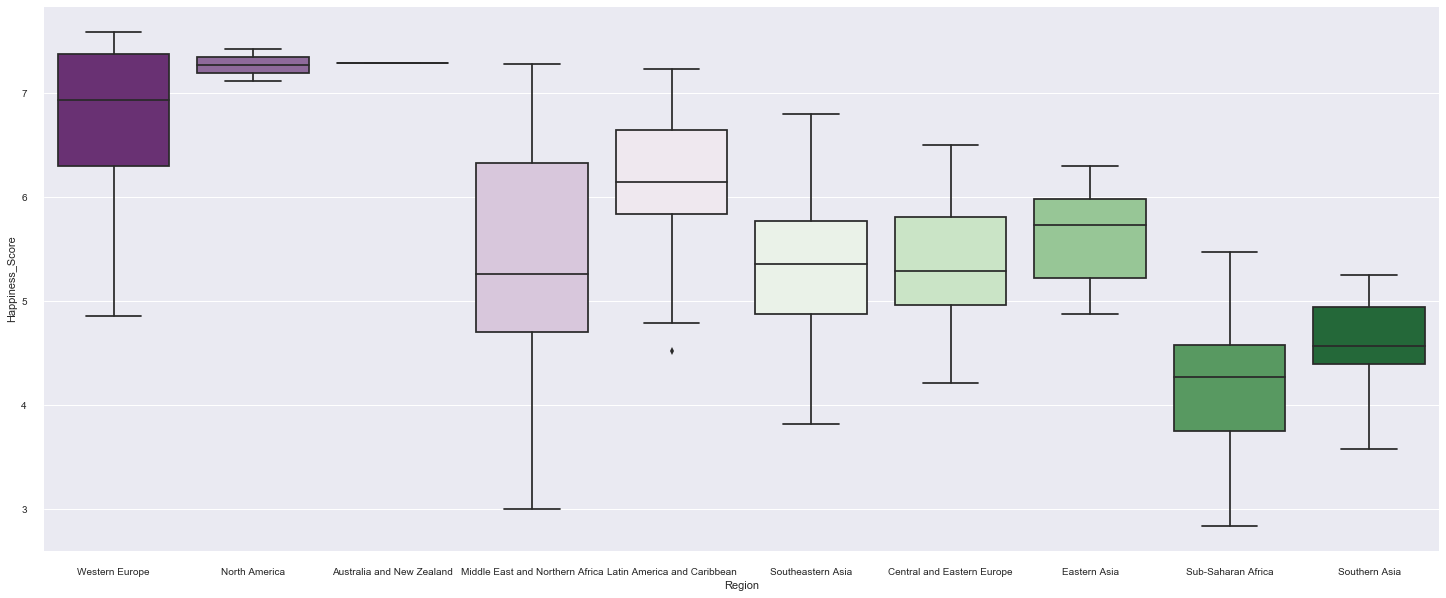

In [68]:
dimension = (25, 10)
fig, ax = pyplot.subplots(figsize=dimension)

seaborn.boxplot(y='Happiness_Score', x='Region', data=generosity_df, palette='PRGn', ax=ax)
seaborn.despine(offset=10, trim=True)

# Middle East and Northern Africa have the largest IQR (Interquatile Range)